In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df=pd.read_csv(r"C:\Users\SAKET NANDAN\Documents\current_hackathon\backorder_prediction\Back order prediction\data_no_null_in_target.csv")


In [3]:
data=df[['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'sales_1_month', 'sales_9_month','went_on_backorder']]

In [4]:
data

,national_inv,lead_time,in_transit_qty,forecast_3_month,sales_1_month,sales_9_month,went_on_backorder
0,0.0,NaN,0.0,0.0,0.0,0.0,0
1,2.0,9.0,0.0,0.0,0.0,0.0,0
2,2.0,NaN,0.0,0.0,0.0,0.0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0
4,8.0,NaN,0.0,0.0,0.0,4.0,0
...,...,...,...,...,...,...,...
1687855,0.0,2.0,0.0,10.0,0.0,7.0,0
1687856,-1.0,NaN,0.0,5.0,1.0,8.0,0
1687857,-1.0,9.0,0.0,7.0,0.0,12.0,1
1687858,62.0,9.0,16.0,39.0,35.0,205.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687860 entries, 0 to 1687859
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   national_inv       1687860 non-null  float64
 1   lead_time          1586967 non-null  float64
 2   in_transit_qty     1687860 non-null  float64
 3   forecast_3_month   1687860 non-null  float64
 4   sales_1_month      1687860 non-null  float64
 5   sales_9_month      1687860 non-null  float64
 6   went_on_backorder  1687860 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 90.1 MB


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Let's divide into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels='went_on_backorder', axis=1),  # predictors
    data['went_on_backorder'],  # target
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((1181502, 6), (506358, 6))

In [8]:
# from feature-engine
from feature_engine import missing_data_imputers as mdi

In [9]:
median_imputer= mdi.MeanMedianImputer(imputation_method='median', variables = ['lead_time'])
median_imputer.fit(X_train)

MeanMedianImputer(imputation_method='median', variables=['lead_time'])

In [10]:
# let's transform the data with the pipeline
X_train_imp= median_imputer.transform(X_train)
X_test_imp= median_imputer.transform(X_test)

In [11]:
#checking after imputation about whether null values removed from both train and test data set or not 
#X_train_imp.isnull().sum()
#X_test_imp.isnull().sum()

In [12]:
from imblearn.under_sampling import NearMiss

In [13]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()#NearMiss do not take random_state arguement 
X_train_under_samp,y_train_under_samp = nm.fit_sample(X_train_imp,y_train)
X_test_under_samp,y_test_under_samp = nm.fit_sample(X_test_imp,y_test)

#### [note:- while trying for bulk test ,we should also use the test data_set on which undersampling is already performed becuse i have trained our model 1:1 ratio of target binary label ,if will use to test the highly imbalnced data set then it will give high overfitting problem ] 

#### if u argue that why i went for this under sampling ?
#### ans:- becoz i used this under sampling to created user interface in which i m taking only one test case , in that case there is no chance of imbalance 

In [14]:
#X_train_under_samp

In [15]:
# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb#  for this i have to install package  "  !pip install lightgbm "
import xgboost as xgb

In [16]:
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

In [17]:
# Classification metrices
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score,recall_score,f1_score,roc_auc_score

In [18]:
names = ["Logistic Regression", "Nearest Neighbors", "Naive Bayes", "Linear SVM", "RBF SVM", 
          "Decision Tree", "Random Forest", "AdaBoost", "Gradient Boosting", 
         "LDA", "QDA", "Neural Net", "LightGBM", "XGBoost" ]

In [19]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(5),
    GaussianNB(),
    SVC(kernel="linear", C=0.025),
    SVC(kernel = "rbf", gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(alpha=1, max_iter=1000),
    lgb.LGBMClassifier(),    
    xgb.XGBClassifier()
   ]

In [20]:
accuracy_scores = []
roc_auc_score=[]
# iterate over classifiers and predict accuracy
for name, clf in zip(names, classifiers):
    clf.fit(X_train_under_samp, y_train_under_samp)
    score = clf.score(X_test_under_samp, y_test_under_samp)
    score = round(score, 4)
    accuracy_scores.append(score)
    print(name ,' : ' , score )


Logistic Regression  :  0.9193
Nearest Neighbors  :  0.9249
Naive Bayes  :  0.8791
Linear SVM  :  0.9173
RBF SVM  :  0.928
Decision Tree  :  0.9257
Random Forest  :  0.9295
AdaBoost  :  0.9267
Gradient Boosting  :  0.9321
LDA  :  0.4821
QDA  :  0.4999


C:\Users\SAKET NANDAN\AppData\Roaming\Python\Python37\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Neural Net  :  0.9299
LightGBM  :  0.9308
XGBoost  :  0.9302


In [21]:
classifiers_performance = pd.DataFrame({"Classifiers": names, "Accuracy Scores": accuracy_scores})
classifiers_performance

,Classifiers,Accuracy Scores
0,Logistic Regression,0.9193
1,Nearest Neighbors,0.9249
2,Naive Bayes,0.8791
3,Linear SVM,0.9173
4,RBF SVM,0.9280
5,Decision Tree,0.9257
6,Random Forest,0.9295
7,AdaBoost,0.9267
8,Gradient Boosting,0.9321
9,LDA,0.4821


In [22]:
#printing accuracy score in descending order
classifiers_performance.sort_values(by = 'Accuracy Scores' , ascending = False)[['Classifiers', 'Accuracy Scores']]

,Classifiers,Accuracy Scores
8,Gradient Boosting,0.9321
12,LightGBM,0.9308
13,XGBoost,0.9302
11,Neural Net,0.9299
6,Random Forest,0.9295
4,RBF SVM,0.9280
7,AdaBoost,0.9267
5,Decision Tree,0.9257
1,Nearest Neighbors,0.9249
0,Logistic Regression,0.9193


In [23]:
#we will perform grid search to hyperparameter tunnig  to find best parameter for each of the top 3 classification algo in above chart

In [34]:
gbc_clf = GradientBoostingClassifier(random_state=42)

gbc_params = {'loss' : ["deviance"],
              'n_estimators' : [40,50,100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [3,4, 8],
              'min_samples_leaf': [50,75,100,150], 
              }

gbc_grid_search = GridSearchCV(estimator = gbc_clf, 
                               param_grid = gbc_params, 
                               scoring = "accuracy", 
                               cv = 5,
                               verbose = 0)

gbc_grid_search.fit(X_train_under_samp,y_train_under_samp)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [35]:
# examine the best model

# best score achieved during the GridSearchCV
print('Gradient Boosting GridSearch CV best score : {:.4f}\n\n'.format(gbc_grid_search.best_score_))

print('Gradient Boosting GridSearch CV roc_auc score : {:.4f}\n\n'.format(gbc_grid_search.best_score_))


# print parameters that give the best results
print('Gradient Boosting Parameters that give the best results :','\n\n', (gbc_grid_search.best_params_))

# print estimator that was chosen by the GridSearch
gbc_best = gbc_grid_search.best_estimator_
print('\n\nGradient Boosting Estimator that was chosen by the search :','\n\n', (gbc_best))

Gradient Boosting GridSearch CV best score : 0.9258


Gradient Boosting GridSearch CV roc_auc score : 0.9258


Gradient Boosting Parameters that give the best results : 

 {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 8, 'min_samples_leaf': 100, 'n_estimators': 100}


Gradient Boosting Estimator that was chosen by the search : 

 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
      

In [36]:
import seaborn as sns 

train set
Gradient boosting Classifier model accuracy score for train set : 0.9304
test set
Gradient boosting Classifier model accuracy score for test set : 0.9298


Confusion matrix

 [[3260  143]
 [ 335 3068]]

True Positives(TP) =  3260

True Negatives(TN) =  3068

False Positives(FP){type 1 error} =  143

False Negatives(FN){type 2 error} =  335



classification report
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3403
           1       0.96      0.90      0.93      3403

    accuracy                           0.93      6806
   macro avg       0.93      0.93      0.93      6806
weighted avg       0.93      0.93      0.93      6806




Classification accuracy : 0.9298



Classification error : 0.0702



Precision : 0.9580



Recall or Sensitivity : 0.9068



True Positive Rate : 0.9068



False Positive Rate : 0.0445



Specificity : 0.9555





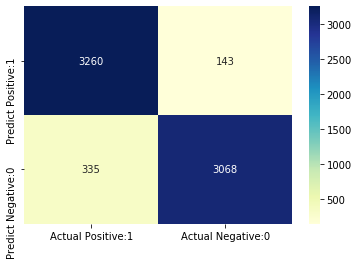

In [37]:
 gbc_clf = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
    
gbc_clf.fit(X_train_under_samp, y_train_under_samp)
#predict train set 
print('train set')
y1_pred = gbc_clf.predict(X_train_under_samp)
# print the accuracy
print('Gradient boosting Classifier model accuracy score for train set : {0:0.4f}'. format(accuracy_score(y_train_under_samp, y1_pred)))

#-------------------------------------------------------------------------------------------------------------------------------

#predict test set
print('test set')
y2_pred = gbc_clf.predict(X_test_under_samp)
# print the accuracy
print('Gradient boosting Classifier model accuracy score for test set : {0:0.4f}\n\n'. format(accuracy_score(y_test_under_samp, y2_pred)))

#-------------------------------------------------confusion matrix-----------------------------------------------------------

# print confusion-matrix

cm = confusion_matrix(y_test_under_samp, y2_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP){type 1 error} = ', cm[0,1])

print('\nFalse Negatives(FN){type 2 error} = ', cm[1,0])
print('\n\n')

#-------------------------------visualization of confusion matrix -----------------------------------------------------------

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#----------------------------------classification report ----------------------------------------------------------------------
print('classification report')
print(classification_report(y_test_under_samp, y2_pred))
print('\n\n')
#-----------------------------------classification accuracy -------------------------------------------------------------------
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
print('\n\n')

#----------------------------------------classification error------------------------------------------------------------------

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))
print('\n\n')

#----------------------------------------precision-----------------------------------------------------------------------------

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))
print('\n\n')

#--------------------------------------------Recall---------------------------------------------------------------------------
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('\n\n')
#--------------------------------------Truepositive rate------------------------------------------------------------------------

true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
print('\n\n')

#--------------------------------------false positive rate---------------------------------------------------------------------
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
print('\n\n')
#------------------------------------------ Specificity (True Negative Rate) --------------------------------------------------
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))
print('\n\n')

#--------------------------------------------------------------------------------------------------------------------------------

In [106]:
lgb_clf = lgb.LGBMClassifier()


lgb_params={'learning_rate': [0.1,0.2,0.3,0.4,0.5], #i tried [0.1,0.5,0.8,1.0]--->[0.1,0.2,0.3,0.4,0.5]-->final [0.1]
    'num_leaves': [14,15,16,18],           #i tried [16,20,25,50]---->[14,15,16,18]--->final[16]
    'objective' : ['binary'],
    'colsample_bytree' :[0.6,0.06,0.006],# i tried this range since colsample should be under range of 0 to 1 [i/10.0 for i in range(6,10)]--
    #----->[i/10.0 for i in np.arange(6,10,0.5)]---->[0.6,0.06,0.006]--->final(0.6)
    'subsample' :[0.6,0.06,0.006],#i tried this range [i/10.0 for i in np.arange(6,10,0.5)](0.6)---->[i/100.0 for i in np.arange(6,10,0.5)](0.06)---
    #--->[i/1000.0 for i in np.arange(6,10,0.5)](0.006)---->[0.6,0.06,0.006]--->final(0.6)     
    'reg_alpha':[1.0,0.35,0.045] ,#[i for i in range(1,10,2)]-->(1.0)--->[i/10.0 for i in np.arange(1,2,0.2)]----
    #---->[i/10.0 for i in np.arange(1,10,0.5)](0.35)--->[i/100.0 for i in np.arange(1,10,0.5)](0.045)--->[1.0,0.35,0.045]-->final(0.045)
    'reg_lambda' :[1.0,0.139,0.01],#[i for i in range(1,10,2)](1)--->[i/10.0 for i in np.arange(1,2,0.2)](0.139)
    #--->[i/100.0 for i in np.arange(1,10,0.5)](0.01)---->[1.0,0.139,0.01]---->final[1.0]
    'random_state':[50],#[40,45,50,75,100,1000]----final[50]
    }


lgb_grid_search = GridSearchCV(estimator = lgb_clf,  
                               param_grid = lgb_params,
                               scoring = 'accuracy',
                               cv = 5,
                               verbose=0)


lgb_grid_search.fit(X_train_under_samp, y_train_under_samp)

GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=Tru...
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.6, 0.06, 0.006],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'num_leaves': [14, 15, 16, 18],
                         'objective': 

In [107]:
# examine the best model

# best score achieved during the GridSearchCV
print('LightGBM GridSearch CV best score : {:.4f}\n\n'.format(lgb_grid_search.best_score_))

# print parameters that give the best results
print('LightGBM Parameters that give the best results :','\n\n', (lgb_grid_search.best_params_))

# print estimator that was chosen by the GridSearch
lgb_best = lgb_grid_search.best_estimator_
print('\n\nLightGBM Estimator that was chosen by the search :','\n\n', (lgb_best))

LightGBM GridSearch CV best score : 0.9271


LightGBM Parameters that give the best results : 

 {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'num_leaves': 16, 'objective': 'binary', 'random_state': 50, 'reg_alpha': 0.045, 'reg_lambda': 1.0, 'subsample': 0.6}


LightGBM Estimator that was chosen by the search : 

 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.6,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=16, objective='binary',
               random_state=50, reg_alpha=0.045, reg_lambda=1.0, silent=True,
               subsample=0.6, subsample_for_bin=200000, subsample_freq=0)


train set
Gradient boosting Classifier model accuracy score for train set : 0.9290
test set
Gradient boosting Classifier model accuracy score for test set : 0.9339


Confusion matrix

 [[3301  102]
 [ 348 3055]]

True Positives(TP) =  3301

True Negatives(TN) =  3055

False Positives(FP){type 1 error} =  102

False Negatives(FN){type 2 error} =  348



classification report
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      3403
           1       0.97      0.90      0.93      3403

    accuracy                           0.93      6806
   macro avg       0.94      0.93      0.93      6806
weighted avg       0.94      0.93      0.93      6806




Classification accuracy : 0.9339



Classification error : 0.0661



Precision : 0.9700



Recall or Sensitivity : 0.9046



True Positive Rate : 0.9046



False Positive Rate : 0.0323



Specificity : 0.9677





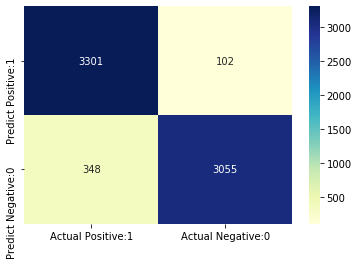

In [109]:
 lgb_clf =lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.6,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=16, objective='binary',
               random_state=50, reg_alpha=0.045, reg_lambda=1.0, silent=True,
               subsample=0.6, subsample_for_bin=200000, subsample_freq=0)
    
lgb_clf.fit(X_train_under_samp, y_train_under_samp)
#predict train set 
print('train set')
y1_pred = lgb_clf.predict(X_train_under_samp)
# print the accuracy
print('Gradient boosting Classifier model accuracy score for train set : {0:0.4f}'. format(accuracy_score(y_train_under_samp, y1_pred)))

#-------------------------------------------------------------------------------------------------------------------------------

#predict test set
print('test set')
y2_pred = lgb_clf.predict(X_test_under_samp)
# print the accuracy
print('Gradient boosting Classifier model accuracy score for test set : {0:0.4f}\n\n'. format(accuracy_score(y_test_under_samp, y2_pred)))

#-------------------------------------------------confusion matrix-----------------------------------------------------------

# print confusion-matrix

cm = confusion_matrix(y_test_under_samp, y2_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP){type 1 error} = ', cm[0,1])

print('\nFalse Negatives(FN){type 2 error} = ', cm[1,0])
print('\n\n')

#-------------------------------visualization of confusion matrix -----------------------------------------------------------

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#----------------------------------classification report ----------------------------------------------------------------------
print('classification report')
print(classification_report(y_test_under_samp, y2_pred))
print('\n\n')
#-----------------------------------classification accuracy -------------------------------------------------------------------
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
print('\n\n')

#----------------------------------------classification error------------------------------------------------------------------

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))
print('\n\n')

#----------------------------------------precision-----------------------------------------------------------------------------

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))
print('\n\n')

#--------------------------------------------Recall---------------------------------------------------------------------------
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('\n\n')
#--------------------------------------Truepositive rate------------------------------------------------------------------------

true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
print('\n\n')

#--------------------------------------false positive rate---------------------------------------------------------------------
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
print('\n\n')
#------------------------------------------ Specificity (True Negative Rate) --------------------------------------------------
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))
print('\n\n')

#--------------------------------------------------------------------------------------------------------------------------------

In [24]:
xgb_clf=xgb.XGBClassifier()

xgb_params={'learning_rate':[0.1],
    'max_depth':[10,12],
    'min_child_weight':[2,3,4],
    'gamma':[0.0],  #note i have tuned gamma using this  'gamma':[i/10.0 for i in range(0,5)]
    'subsample':[0.9], # i have tuned subsample using this  'subsample':[i/10.0 for i in range(6,10)]
    'colsample_bytree':[0.7] ,#i have tuned colsample_bytree using this technique  'colsample_bytree':[i/10.0 for i in range(6,10)]
    'scale_pos_weight':[1.0,0.5],
     'reg_alpha':[ 1,1.2],  #i have tuned using this  'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
    'reg_lambda' : [1.4,1.6],
    'random_state':[50]
    }
xgb_grid_search = GridSearchCV(estimator = xgb_clf,  
                               param_grid = xgb_params,
                               scoring = 'accuracy',
                               cv = 5,
                               verbose=0)
xgb_grid_search.fit(X_train_under_samp, y_train_under_samp)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7], 'gamma': [0.0],
                         'learning_rate': [0.1], 'max_depth': [10, 12],
                   

In [28]:
# examine the best model

# best score achieved during the GridSearchCV
print('XGBoosting GridSearch CV best score : {:.4f}\n\n'.format(xgb_grid_search.best_score_))

# print parameters that give the best results
print('XGBoosting Parameters that give the best results :','\n\n', (xgb_grid_search.best_params_))

# print estimator that was chosen by the GridSearch
xgb_best = xgb_grid_search.best_estimator_
print('\n\ XGBoosting Estimator that was chosen by the search :','\n\n', (xgb_best))

XGBoosting GridSearch CV best score : 0.9265


XGBoosting Parameters that give the best results : 

 {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 3, 'random_state': 50, 'reg_alpha': 1.2, 'reg_lambda': 1.6, 'scale_pos_weight': 1.0, 'subsample': 0.9}

\ XGBoosting Estimator that was chosen by the search : 

 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=50, reg_alpha=1.2,
              reg_lambda=1.6, scale_pos_weight=1.0, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)


train set
Gradient boosting Classifier model accuracy score for train set : 0.9304
test set
Gradient boosting Classifier model accuracy score for test set : 0.9305


Confusion matrix

 [[3263  140]
 [ 333 3070]]

True Positives(TP) =  3263

True Negatives(TN) =  3070

False Positives(FP){type 1 error} =  140

False Negatives(FN){type 2 error} =  333



classification report
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3403
           1       0.96      0.90      0.93      3403

    accuracy                           0.93      6806
   macro avg       0.93      0.93      0.93      6806
weighted avg       0.93      0.93      0.93      6806




Classification accuracy : 0.9305



Classification error : 0.0695



Precision : 0.9589



Recall or Sensitivity : 0.9074



True Positive Rate : 0.9074



False Positive Rate : 0.0436



Specificity : 0.9564





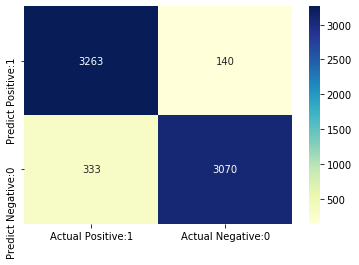

In [32]:
 xgb_clf =xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=50, reg_alpha=1.2,
              reg_lambda=1.6, scale_pos_weight=1.0, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)


    
xgb_clf.fit(X_train_under_samp, y_train_under_samp)
#predict train set 
print('train set')
y1_pred = xgb_clf.predict(X_train_under_samp)
# print the accuracy
print(' xtra Gradient boosting Classifier model accuracy score for train set : {0:0.4f}'. format(accuracy_score(y_train_under_samp, y1_pred)))

#-------------------------------------------------------------------------------------------------------------------------------

#predict test set
print('test set')
y2_pred = xgb_clf.predict(X_test_under_samp)
# print the accuracy
print('xtra Gradient boosting Classifier model accuracy score for test set : {0:0.4f}\n\n'. format(accuracy_score(y_test_under_samp, y2_pred)))

#-------------------------------------------------confusion matrix-----------------------------------------------------------

# print confusion-matrix

cm = confusion_matrix(y_test_under_samp, y2_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP){type 1 error} = ', cm[0,1])

print('\nFalse Negatives(FN){type 2 error} = ', cm[1,0])
print('\n\n')

#-------------------------------visualization of confusion matrix -----------------------------------------------------------

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#----------------------------------classification report ----------------------------------------------------------------------
print('classification report')
print(classification_report(y_test_under_samp, y2_pred))
print('\n\n')
#-----------------------------------classification accuracy -------------------------------------------------------------------
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
print('\n\n')

#----------------------------------------classification error------------------------------------------------------------------

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))
print('\n\n')

#----------------------------------------precision-----------------------------------------------------------------------------

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))
print('\n\n')

#--------------------------------------------Recall---------------------------------------------------------------------------
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('\n\n')
#--------------------------------------Truepositive rate------------------------------------------------------------------------

true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
print('\n\n')

#--------------------------------------false positive rate---------------------------------------------------------------------
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
print('\n\n')
#------------------------------------------ Specificity (True Negative Rate) --------------------------------------------------
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))
print('\n\n')

#--------------------------------------------------------------------------------------------------------------------------------

## Enesamble Modeling

In [42]:
votingC = VotingClassifier(estimators=[('xgb', xgb_best), ('lgb',lgb_best), ('gbc',gbc_best)], voting='soft')

votingC = votingC.fit(X_train_under_samp, y_train_under_samp)

In [ ]:

#predict train set 
print('train set')
y1_pred = votingC.predict(X_train_under_samp)
# print the accuracy
print('voting ensamble Classifier model accuracy score for train set : {0:0.4f}'. format(accuracy_score(y_train_under_samp, y1_pred)))

#-------------------------------------------------------------------------------------------------------------------------------

#predict test set
print('test set')
y2_pred = votingC.predict(X_test_under_samp)
# print the accuracy
print('voting ensamble Classifier model accuracy score for test set : {0:0.4f}\n\n'. format(accuracy_score(y_test_under_samp, y2_pred)))

#-------------------------------------------------confusion matrix-----------------------------------------------------------

# print confusion-matrix

cm = confusion_matrix(y_test_under_samp, y2_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP){type 1 error} = ', cm[0,1])

print('\nFalse Negatives(FN){type 2 error} = ', cm[1,0])
print('\n\n')

#-------------------------------visualization of confusion matrix -----------------------------------------------------------

# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#----------------------------------classification report ----------------------------------------------------------------------
print('classification report')
print(classification_report(y_test_under_samp, y2_pred))
print('\n\n')
#-----------------------------------classification accuracy -------------------------------------------------------------------
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
print('\n\n')

#----------------------------------------classification error------------------------------------------------------------------

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))
print('\n\n')

#----------------------------------------precision-----------------------------------------------------------------------------

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))
print('\n\n')

#--------------------------------------------Recall---------------------------------------------------------------------------
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('\n\n')
#--------------------------------------Truepositive rate------------------------------------------------------------------------

true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
print('\n\n')

#--------------------------------------false positive rate---------------------------------------------------------------------
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
print('\n\n')
#------------------------------------------ Specificity (True Negative Rate) --------------------------------------------------
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))
print('\n\n')

#--------------------------------------------------------------------------------------------------------------------------------

#### if we see that XGBClassifier is giving better result than this voting classifier so i will design our model with XGBClassifier only 